In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Student Depression Dataset.csv')
df = df.dropna()
df = df.drop(columns=['id', 'City', 'Work Pressure', 'Job Satisfaction', 'Profession', 'Degree'])

df_input = df.drop('Depression', axis=1)
df_input = pd.get_dummies(df_input)
# df_input.head()

In [3]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_input)

df['Cluster'] = kmeans.labels_
# df.to_csv('Student Depression Dataset with Cluster.csv', index=False)

df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Cluster
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,Yes,3.0,1.0,No,1,1
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,No,3.0,2.0,Yes,0,0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,No,9.0,1.0,Yes,0,1
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,Yes,4.0,5.0,Yes,1,1
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,Yes,1.0,1.0,No,0,0


In [4]:
sil_score = silhouette_score(df_input, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.311273976727732


In [5]:
n_clusters_max = 10
silhouette_scores = []

for n_clusters in range(2, n_clusters_max + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_input)
    score = silhouette_score(df_input, kmeans.labels_)
    silhouette_scores.append((n_clusters, score))
    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {score}")

Number of Clusters: 2, Silhouette Score: 0.311273976727732
Number of Clusters: 3, Silhouette Score: 0.2818019092160289
Number of Clusters: 4, Silhouette Score: 0.25260110874141456
Number of Clusters: 5, Silhouette Score: 0.22227478657347927
Number of Clusters: 6, Silhouette Score: 0.1991224162866804
Number of Clusters: 7, Silhouette Score: 0.17595413543053484
Number of Clusters: 8, Silhouette Score: 0.16703687678442927
Number of Clusters: 9, Silhouette Score: 0.15814007396138333
Number of Clusters: 10, Silhouette Score: 0.1516988870820173


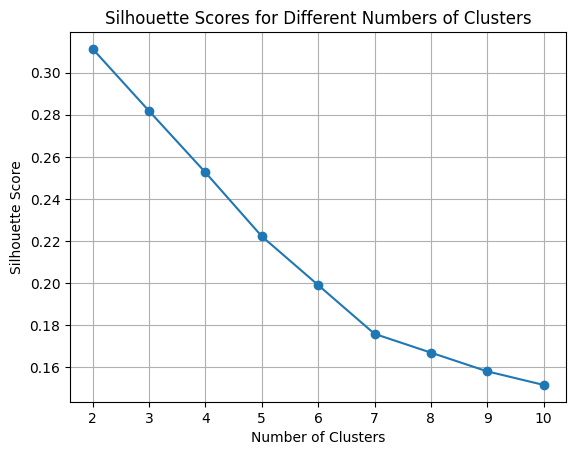

In [6]:
clusters, scores = zip(*silhouette_scores)
plt.plot(clusters, scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.grid(True)
plt.show()